<a href="https://colab.research.google.com/github/nicholasfurl/Great-Courses/blob/main/Lesson09_SVM_malware.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#we will train a k-nearest neighbors classifier to identify malware.

In [ ]:
#No tf/keras needed yet
#yay! plots! I need to learn these ...

from sklearn import neighbors
import matplotlib.pyplot as plt

In [ ]:
#Data come from Great Courses
!wget https://github.com/mlittmancs/great_courses_ml/raw/master/data/malware-test.csv
!wget https://github.com/mlittmancs/great_courses_ml/raw/master/data/malware-train.csv

--2023-01-05 10:19:56--  https://github.com/mlittmancs/great_courses_ml/raw/master/data/malware-test.csv
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mlittmancs/great_courses_ml/master/data/malware-test.csv [following]
--2023-01-05 10:19:57--  https://raw.githubusercontent.com/mlittmancs/great_courses_ml/master/data/malware-test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11593257 (11M) [text/plain]
Saving to: ‘malware-test.csv’

malware-test.csv    100%[===================>]  11.06M  --.-KB/s    in 0.04s   

2023-01-05 10:19:57 (258 MB/s) - ‘malware-test.csv’ saved [11593257/11593257

In [ ]:
#declare a getdat function, which collects the data and labels within the file used for training. 
#We loop over the lines of the given file one by one, splitting each line into components at the commas. 
#The data file uses pe-malicious to label the positive instances of malware. 
#So, we use == "pre-malicious" to turn those labels into 0/False for safe and 1/True for malware. 
#The function returns the data and the labels for the file. Since the data is read from the file as a string, 
#each component needs to be converted to a floating point number.
#We then use this funciton to get the training and test data used for our model.

#This cell is only a function definition

def getdat(filename):

    #So with closes resources after using them and is often used when opening a file.
    #I guess it eliminates the f after data is created?
    #no f is a TextIOWrapper and seems to still exist after
    #It is supposed to be like a try/catch block and relate to exception handling somehow too
    with open(filename, "r") as f:
       data = f.readlines()

    #anyway, now we have data, which is a list with 4000 items, each of which is a string of comma separated data

    #Initial lists we will use for output (brackets define a list)
    dat = []
    labs = []

    #Loops through each line and takes the string and splits it into data 
    for line in data:

        #Splits each line into a new list along the commas. Wordline should have 487 items
        wordline = line.split(",")

        #append to label list (+ can append to a list apparently) "True" (not a one) if the first item in this line is "pe-malicious"
        #does it authomatically pad a False otherwise, even for elements past the last true?
        labs = labs + [wordline[0] == "pe-malicious"]

        #mini-loop through all the data items in wordline, converting each to float and then appending as new items to data list
        dat = dat + [[float(wordline[i]) for i in range(1,len(wordline))]]

    #Return lists of labels and datalines (float)
    return(dat,labs)


In [ ]:
#Skip this cell. It just tests what elements in the function definition do / look like

with open("malware-train.csv", "r") as f:
       data = f.readlines()

      #It's a list from one of these GC files so contains a string with comma separated data values and its hard to say how many without split (for me anyway)
       test = data[0]

      
       test01 = test.split(",")

       print(test01[0])

labs = []


pe-legit


In [ ]:
traindat, trainlabs = getdat("malware-train.csv")
testdat, testlabs = getdat("malware-test.csv")

#traindat should be a 4000 item list
print(traindat[0])
#trainlabs should be a 4000 item list
print(trainlabs[0])
#testdat should be a 2000 item list
print(testdat[0])
#testlabs should be a 2000 item list
print(testlabs[0])

[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.266666666667, 0.141176470588, 0.0627450980392, 0.313725490196, 0.341176470588, 1.0, 0.0823529411765, 0.439215686275, 0.443137254902, 0.250980392157, 0.0, 0.41568627451, 0.0823529411765, 0.333333333333, 0.333333333333, 1.0, 0.454901960784, 0.141176470588, 0.125490196078, 1.0, 0.454901960784, 0.141176470588, 0.125490196078, 0.333333333333, 1.0, 0.207843137255, 0.345098039216, 0.211764705882, 0.258823529412, 0.0, 1.0, 0.0823529411765, 0.533333333333, 0.443137254902, 0.250980392157, 0.0, 0.333333333333, 1.0, 0.462745098039, 0.0470588235294, 0.909803921569, 0.56862745098, 0.839215686275, 1.0, 1.0, 0.223529411765, 0.176470588235, 0.298039215686, 0.211764705882, 0.258823529412, 0.0, 0.458823529412, 0.360784313725, 0.41568627451, 0.0313725490196, 1.0, 0.207843137255, 0.345098039216, 0.211764705882, 0.258823529412, 0.0, 1.0, 0.0823529411765, 0.376470588235, 0.0149752461244, 0.00418444903211, 0.00396123727204, 0.00395763708237, 0.00402809

In [ ]:
#define a testscore function, which calculates the number of correctly classified examples in the test set.

#Just the function definition
def testscore(dat,labs):

    #So presumably labs is the same labs as the output of getdat
    #But dat will be a model object clf?

    #genberate labvel preditions
    yhats = clf.predict(dat)

    #Match predictions and labels in usual way
    correct = sum([yhats[i] == labs[i] for i in range(len(dat))])

    #Retrun proportion correct
    return(correct)

In [ ]:
#Run nearest neighbor on training data and get accuracy on test data

#Initialise a list to hold accuracy values for each level of k (the number of nearest neighbors considered)
acc = []

#Appears to be number of observations in training to use. 4000 happens to be all of them
m = 4000

#for k in [1,5,7,9]: #main lesson
for k in [1]: #aux lesson

    #Create configured object for nearest neighbor
    clf = neighbors.KNeighborsClassifier(n_neighbors=k,metric="cosine")

    #fit object (which I guess doesn't do much, as there is no real training)
    clf = clf.fit(traindat[:m], trainlabs[:m])

    #accumulate a list of output for each k, including the k value, the accuracy for training set and accuracy for test set
    acc = acc + [[k, testscore(traindat[:m],trainlabs[:m])/m, testscore(testdat,testlabs)/len(testlabs)]]

print(acc)

[[1, 1.0, 0.8705]]


Text(0, 0.5, 'acc')

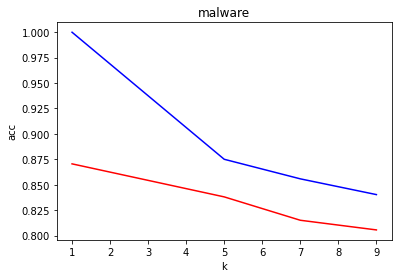

In [ ]:
#skip this if doing aux lesson. This is main lesson only

#Good, finally a plot

#plt is from matplotlib.pyplot
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

#so it's x then y then formats
#I can't just index acc over directly?
#v must be a generic iterator name or is a special keyword for value?
#v[0] for v in acc" must be 0th index (really, first value)  in each list item v of acc? Then it would be the k value 1, 5, 7 and 9 as x
#v[1] and v[2] refer to first and second index into the vth item of list acc

# Plot dependence on k
plt.plot([v[0] for v in acc], [v[1] for v in acc], c="blue")
plt.plot([v[0] for v in acc], [v[2] for v in acc], c="red")
plt.title('malware')
plt.xlabel('k')
plt.ylabel('acc')
#plt.show()

In [ ]:
#this is for aux lesson only

#We saw that, in 4 or more dimensional spaces, most things are far away. As such, 
#k nearest neighbors is likely to have a difficult time. Then, we saw 1-nearest 
#neighbor perform quite well in the 486-dimensional space created for detecting malware. 
#How could that be? Let's write a program for checking the distances between testing 
#instances and its nearest neighbor in the training set. We'll compare these distances 
#to what we get in a dataset with the same attribute values, scrambled between instances
#---that represents a space with the same dimensionality and save distribution over 
#attribute values, but where associations between attributes are random. Plot histograms of 
#the distances to see how nearest neighbor distances in the real data compare to the randomized data. 
#What do you notice? What impact would you expect the differences to have on the accuracy of 1-nearest neighbor in this dataset?

#function def only

import numpy as np

#takes each element of test set and finds distance from nearest neighbor in training set

def getmins(mat1,mat2):

  #mat1 will be training set and mat2 will be test set

  #initialise list
  mindists = []

  #Loop through every item in test set list
  for i in range(mat2.shape[0]):

    #Take the ith test item from list
    vec = mat2[i]

    #Make list of the squared subtractions (summed over dims) of every element in trainiong set (mat 1) and this ith test observation
    dists = np.sum(((vec - mat1)**2),axis=1)

    #Find the smallest distance in the list of distances between ith test item and all training items and appends it to list
    #+= doesn't appeatr to do any arithmetic addition, instead it "adds" to the list
    mindists += [ min(dists) ]

  #return sum of minimum distances between test items and nearest neighbours  
  return(mindists)

In [ ]:

#Not sure why we need to specify items in traindat up to m if m is going to be the total number of items in traindat?
mat1 = np.array(traindat[:m])
mat2 = np.array(testdat)

#unscrambled!
#Get list of distances to nearest neighbor for each test item
dat = getmins(mat1,mat2)

#Scrambled!
#Loop through features (columns) in training data
#{train is 4000(observations)*486(features)}
for i in range(mat1.shape[1]):

  #shuffle the rows of that feature
  np.random.shuffle(mat1[:,i])
  #test has same number of features so can shuffle test here too
  np.random.shuffle(mat2[:,i])

#get list of distances to nearest neighbor for scrambled too
scr = getmins(mat1,mat2)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


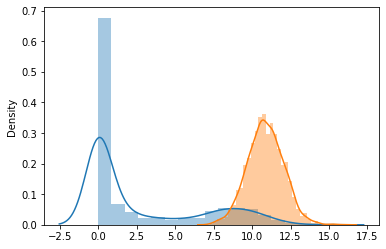

In [ ]:
#Now my favorite part - learn to do histograms in Python!
import seaborn as sns

# sns.set_style('darkgrid')
sns.distplot(dat)
sns.distplot(scr)